In [1]:
from main import *
from useful_functions import *
from visualization import *

%matplotlib inline
plt.rcParams['font.size'] = 6

# Setting paths

In [2]:
top_directory = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/'
atlas_path = '/home/anleg84/Documents/Atlas/Mapzebrain/'

In [3]:
atlas = MapzebrainAtlas(atlas_path)
centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
centroids[:, 1] = 974 - centroids[:, 1]
excluded = np.load('Results/excluded_regions.npy')

centroids_ = np.delete(centroids, np.concatenate([excluded, excluded + 70]), axis=0)

# Loading figure-related data

In [5]:
state_matrix = np.load('Results/figure4_state_matrix.npy')
RSS = np.load('Results/figure4_RSS.npy')
RSS_threshold = np.load('Results/figure4_RSS_threshold.npy')

# Figure layout

array([  892.,  1784.,  2676.,  3568.,  4460.,  5352.,  6244.,  7136.,
        8028.,  8920.,  9812., 10704., 11596., 12488., 13380., 14272.,
       15164., 16056., 16948., 17840., 18732.])

In [20]:
state_matrix.shape[1]

19624

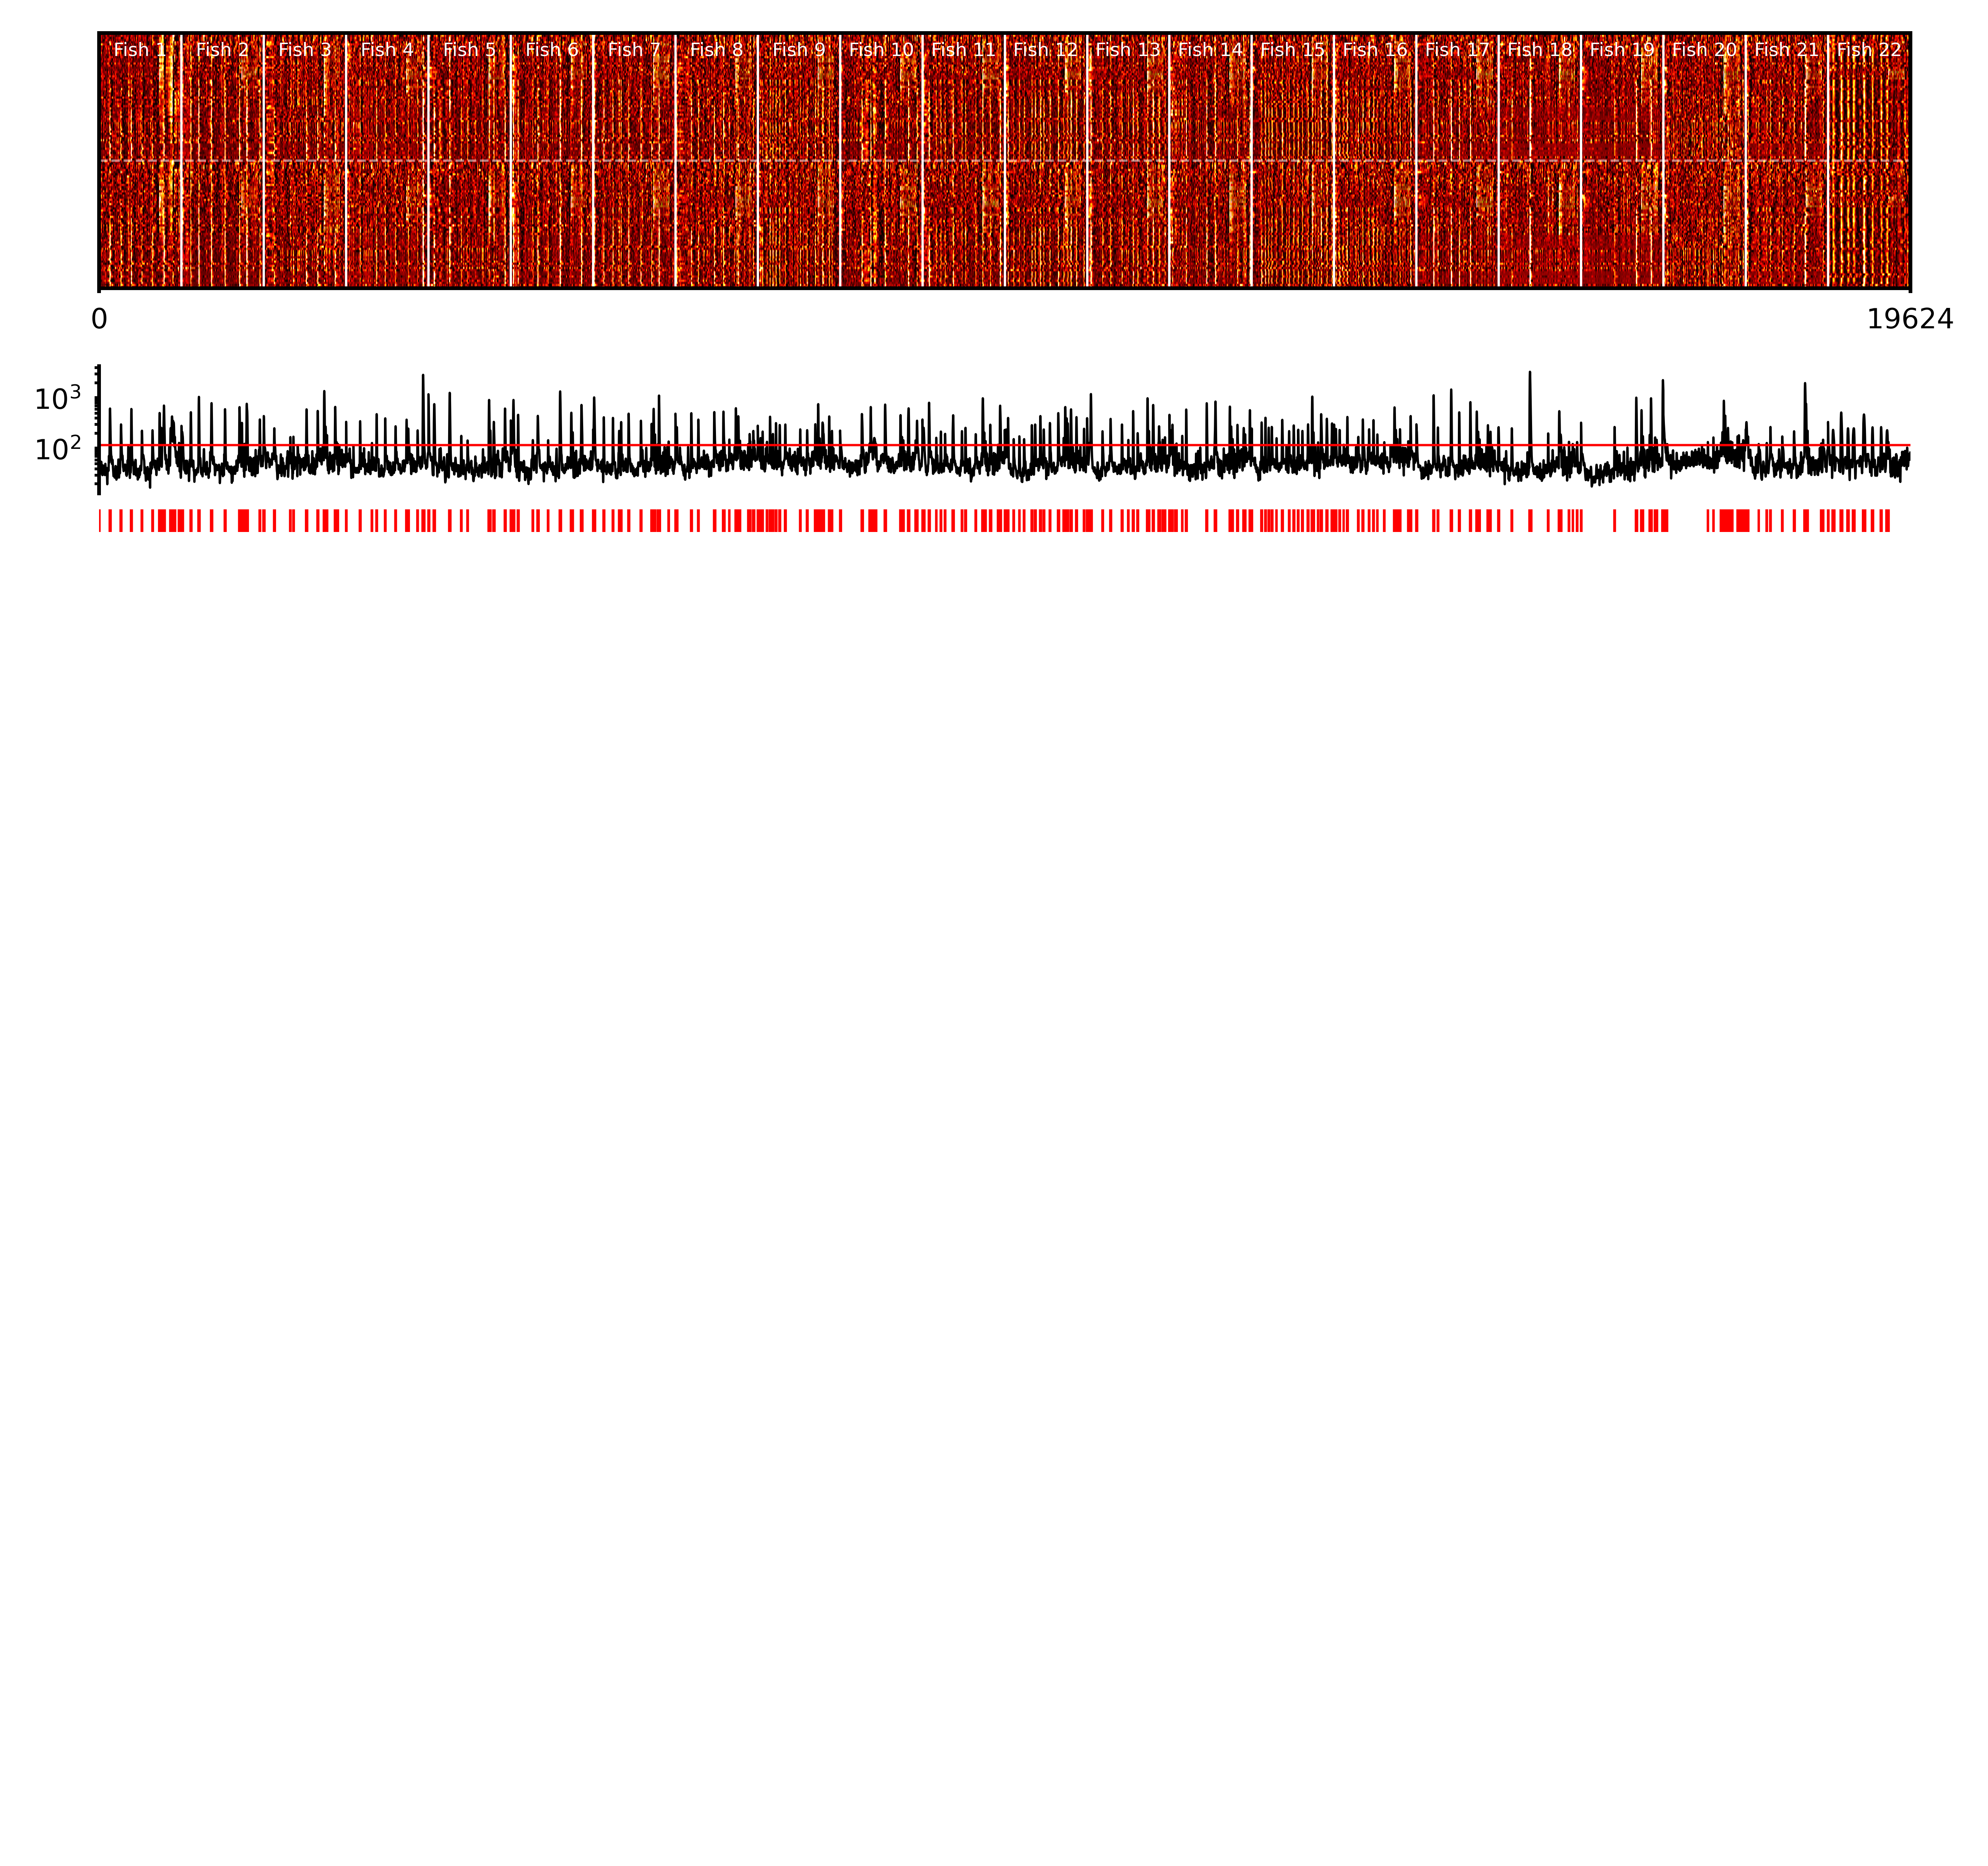

In [65]:
fig = PaperFigure(figsize=(7, 7), dpi=900)

fig.set_tick_length(1)
fig.set_font_size(6)
fig.add_background()

# Adding panels -------------------------------

fig.add_axes('state_matrix', (0, 0), 7, 1)

fig.add_axes('RSS', (0, 1.3), 7, 0.5)

fig.add_axes('RSS_events', (0, 1.8), 7, 0.2)



# Content -------------------------------------

ax = fig.axes['state_matrix']
im = ax.imshow(state_matrix, cmap='hot', aspect='auto', vmin=-1, vmax=3)
x_values = np.linspace(0, state_matrix.shape[1], 23, endpoint=True)
for x in x_values[1:-1]:
    ax.plot([x, x], [0, state_matrix.shape[0] - 0.5], color='white', linestyle='-', linewidth=0.5)
for i, x in enumerate(x_values[1:]):
    ax.text(x - (state_matrix.shape[1] / 44), 10, 'Fish {}'.format(i + 1), ha='center', color='white', fontsize=4)
ax.plot([0, state_matrix.shape[1] - 0.5], [state_matrix.shape[0] / 2 - 0.5, state_matrix.shape[0] / 2 - 0.5], color='white', linewidth=0.5, alpha=0.5, linestyle='--')
ax.set_xticks([0, state_matrix.shape[1]])
ax.set_yticks([])
#cbar = plt.colorbar(im, ax=ax, fraction=0.005, pad=0.005)
#cbar.set_ticks([-1, 3])
#cbar.set_label('z-scored fluo.', rotation=270, labelpad=3)

ax = fig.axes['RSS']
ax.plot(RSS, color='black', linewidth=0.5)
ax.plot(RSS_threshold, color='red', linewidth=0.5)
ax.set_xlim([0, len(RSS)])
ax.set_yscale('log')
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_xticks([])

ax = fig.axes['RSS_events']
ax.eventplot(np.where(RSS > RSS_threshold)[0], color='red', linewidth=0.5)
ax.set_xlim([0, state_matrix.shape[1]])
ax.axis('off')

    
# Display -------------------------------------

fig.show()

In [66]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure4_incomplete.svg')

In [67]:
np.sum(RSS > RSS_threshold)

2376